In [1]:
import matplotlib.pyplot as plt
from keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Fashion-MNIST is a dataset of images consisting of 10 different fashion categories, with 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding fashion category. The Fashion-MNIST dataset is often used as a drop-in replacement for the original MNIST dataset, as it is more challenging and better represents real-world computer vision tasks.

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

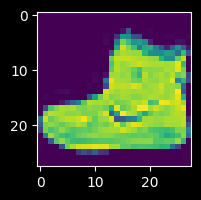

In [7]:
plt.figure(figsize=(15, 2))
plt.imshow(X_train[0])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(3000, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(10, activation="sigmoid"),
    ]
)

2023-07-31 11:25:59.582309: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-07-31 11:25:59.582399: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-07-31 11:25:59.582415: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-07-31 11:25:59.582892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-31 11:25:59.583275: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
ann.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [11]:
ann.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


2023-07-31 11:26:22.790658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 30s 14ms/step - loss: 15.6508 - accuracy: 0.6860
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 91.7466 - accuracy: 0.7276
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 207.4168 - accuracy: 0.7417
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 405.3135 - accuracy: 0.7390
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 670.4922 - accuracy: 0.7394


In [12]:
ann.evaluate(X_test, y_test)

  6/313 [..............................] - ETA: 3s - loss: 748.4357 - accuracy: 0.7760  

2023-07-31 11:28:43.778032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 1103.1968 - accuracy: 0.7212


[1103.19677734375, 0.7211999893188477]

In [13]:
y_pred = ann.predict(X_test)

 28/313 [=>............................] - ETA: 1s

2023-07-31 11:28:49.163856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


In [14]:
cnn = models.Sequential(
    [
        layers.Conv2D(
            filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [15]:
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [16]:
cnn.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


2023-07-31 11:29:13.788471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 21s 10ms/step - loss: 0.4782 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3332 - accuracy: 0.8809
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3066 - accuracy: 0.8905
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3076 - accuracy: 0.8939
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3424 - accuracy: 0.8926


In [17]:
cnn.evaluate(X_test, y_test)

  9/313 [..............................] - ETA: 2s - loss: 0.4984 - accuracy: 0.8993  

2023-07-31 11:32:59.804539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.4030 - accuracy: 0.8829


[0.4029518663883209, 0.8828999996185303]